### Notebook for looking at van der Meer's subduction zone configurations - Initiation and Death

- Identify places where subduction starts or stops according to the van der Meer interpretation
- Compute distance to continent at the start/end time
- save results to csv

In [1]:
import pygplates
import glob
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.basemap import Basemap
import pandas as pd

%matplotlib inline

LLSVP_edge_filename = '/Users/Simon/Data/SeismicTomography/SMEAN/SMEANSLOW1'


basedir = './vanderMeerData/'

file_list = glob.glob('%s/*.shp' % basedir)

age_list = []
depth_list = []
blen_list = []

names_list = []

for filename in file_list:
    depth = float(filename[-16:-12])
    layer_radius = pygplates.Earth.mean_radius_in_kms-depth
    age_list.append(float(filename[-9:-6]))
    depth_list.append(depth)

    features = pygplates.FeatureCollection(filename)

    for feature in features:
        btype = feature.get_shapefile_attribute('Id')
        if btype==5:
            names_list.append(feature.get_shapefile_attribute('name'))
        
ds = pd.Series(names_list)

unique_slab_list = ds.sort_values().unique()
print unique_slab_list
print len(unique_slab_list)


['ARCTIC' 'Acaste' 'Admete' 'Aethra' 'Al' 'Amaltheia' 'Amphitrite'
 'Andean' 'Andes' 'Apulia' 'Argia' 'Australia' 'Banda' 'Beroe' 'Bh'
 'Bolbe' 'Callirrhoe' 'Calypso' 'Caphira' 'Caribbean' 'Ceto' 'Chryseis'
 'Clio' 'Clymene' 'Clytia' 'Cocos' 'Cyprus' 'Daira' 'Desventuradas'
 'Dione' 'EASIA' 'EASIA2' 'EAUSTRAL' 'EBURMA' 'EINDONESIA' 'EINDONESIA2'
 'EPANTH' 'EPANTH2' 'EPAPUA' 'EPHILIPPINES' 'ETethys2' 'East Philippines'
 'East of Md' 'EastPhilippines' 'Eindonesia' 'Electra' 'Ephyra' 'Etethys'
 'Eudore' 'Eurynome' 'GI' 'GREATERANTILLES' 'Galaxaure' 'Gorda' 'Guerrero'
 'Hd' 'Hippo' 'INDONESIA' 'INDOSINIAN' 'Ianira' 'Ianthe' 'Iberia' 'Idiya'
 'Idyia' 'Intra-Pac' 'Intra-Pacific' 'IzuBonin' 'Junggar-NESiberia'
 'Kangaroo' 'Kl' 'Kleodora' 'Koyukuk' 'Leucippe' 'Luzon' 'Lysithea'
 'MIDPANTH' 'Ma' 'Mainitsky' 'Mainitsky-Mai' 'Marianas' 'Melia' 'Meliboea'
 'Menestho' 'Merope' 'Metis' 'Mexico' 'N Austral' 'NAUSTRALIA' 'NEASIA'
 'NEINDIA' 'NEINDIA2' 'NEPANTH' 'NEPANTH2' 'NEPANTH3' 'NEPAPUA' 'NETETH'

In [2]:
# For each pair of successive snapshots, plot plate boundary configuration
#(non-subduction zones are plotted faintly)
# Red is more recent, black is older of the two times
def plot_VDM_slab(slabname):

    plt.figure(figsize=(10,5))

    m = Basemap(projection='robin',lon_0=0)
    m.drawcoastlines()
    m.readshapefile(LLSVP_edge_filename,'tmp',color='gray',linewidth=5,zorder=2)

    color_idx = np.linspace(0, 1, len(file_list))

    for i,filename in zip(color_idx,file_list):
        #dummy line plot to get legend
        plt.plot(-999,-999,color=plt.cm.jet_r(i),
                 linewidth=2,label='%s Ma' % float(filename[-9:-6]))
        features = pygplates.FeatureCollection(filename)
        for feature in features:
            btype = feature.get_shapefile_attribute('Id')
            if feature.get_geometry() is not None:
                points = feature.get_geometry().to_lat_lon_array()
                if feature.get_shapefile_attribute('name')==slabname: 
                    x,y = m(points[:,1],points[:,0])
                    m.plot(x,y,color=plt.cm.jet_r(i),
                             linewidth=4,zorder=200-i)
                    lastfile = filename
                #elif slabname in feature.get_shapefile_attribute('name'):
                #    x,y = m(points[:,1],points[:,0])
                #    m.plot(x,y,color=plt.cm.jet_r(i),
                #             linewidth=4,zorder=200-i)
                #    lastfile = filename
                    

    print float(lastfile[-9:-6])
    plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left',fontsize=8)
    plt.title('%s, initiation %s Ma' % (slabname,lastfile[-9:-6]))
    plt.show()



In [3]:
VDM2009_slablist = ['Aegean','Mongol-Okhotsk','Farallon','Ag','Al','At','Ba','Bf','Ca','CC',\
                'Ch','EC','Eg','GI','Hi','Id','Kc','Mc','Md','Me','Mg','NP','Ro','Sa','So',
                'TA','Ve','Wc']


slab_list = VDM2009_slablist
#slab_list = unique_slab_list

#for slab in slab_list:
#    plot_VDM_slab(slab)



In [4]:
# Plot the apparent 'initiation' sites of VDM slab interpretation, 
# assuming that:
# 1. The label strings for each line are consistent, so that if there 
#    are multiple lines at different times for 'SlabX', then the oldest
#    one represents the initiation
# 2. 

#rotation_model = pygplates.RotationModel('/Users/Simon/Data/EByteSVN/EByteDeformingModels/Global_Model_WD_Internal_Release_2014.1_VDM2010APM/Global_EarthByte_TPW_GeeK07_2014.1_VanDerMeer_CrossoverFix.rot')
rotation_model = pygplates.RotationModel('./MullerData/Global_EarthByte_230-0Ma_GK07_AREPS_VDM.rot')
# Static polygons to determine whether subduction segment is adjacent to continent or not
#static_polygon_filename = '/Users/Simon/Work/DynamicTopography/MODELS/StaticPolygons/StaticPolygonsForPlateFrame2013.2.shp'
static_polygon_filename = './MullerData/continental_polygons.gpmlz'
static_polygon_features = pygplates.FeatureCollection(static_polygon_filename)

# Function to get distance to nearest continental polygon (should be reconstructed already)
def get_nearest_continental_polygon(seed_point,continental_polygons):
    
    min_distance_to_all_features = np.radians(180)
    nearest_continent = None        

    for polygon in continental_polygons:
        if polygon is not None:
            min_distance_to_feature = pygplates.GeometryOnSphere.distance(
                polygon.get_reconstructed_geometry(),
                seed_point,
                min_distance_to_all_features,
                geometry1_is_solid=True)

            # If the current geometry is nearer than all previous geometries then
            # its associated feature is the nearest feature so far.
            if min_distance_to_feature is not None:
                min_distance_to_all_features = min_distance_to_feature
                nearest_continent = polygon.get_feature().get_reconstruction_plate_id()
                    
    return min_distance_to_all_features*pygplates.Earth.mean_radius_in_kms


# define a function to locate the first or last appearance of a slab with a certain name
def subduction_startstop(flist,slablist):
# note that this function is not very computationally efficient, but since
# there are so few slabs to go through, not much point making it faster

    szLon=[]
    szLat=[]
    szd2c=[]
    sztime=[]
    
    DataFrameTemplate = ('lon','lat','dist2cont','Age')
    df_AllTimes = pd.DataFrame(columns=DataFrameTemplate)
    
    # iterate over each slab name in the list
    for slabname in slablist:
        
        # iterate over each file for each slabname, look for feature with 
        # slab name matching the current slab of interest
        for filename in flist:
            #dummy line plot to get legend
            features = pygplates.FeatureCollection(filename)
            for feature in features:
                btype = feature.get_shapefile_attribute('Id')
                if btype==5 or btype==1 or btype==4:
                    if feature.get_geometry() is not None:
                        points = feature.get_geometry().to_lat_lon_array()
                        if feature.get_shapefile_attribute('name')==slabname: 
                            # each time we get to here, the lastfile is updated
                            # but we only get to here if the slab is present at this time,
                            # so the last time we come through this if statement is the 
                            # birth time (or death if time order reversed)
                            lastfile = filename

        # Having completed the iteration to find the birth/death time, now focus on that 
        # one time and get the distance to continents
        if lastfile[-9:-6]!='235':

            reconstructed_continental_polygons = []
            pygplates.reconstruct(static_polygon_features,
                          rotation_model,
                          reconstructed_continental_polygons,
                          float(lastfile[-9:-6]),
                          anchor_plate_id=0)

            features = pygplates.FeatureCollection(lastfile)
            for feature in features:
                btype = feature.get_shapefile_attribute('Id')
                if btype==5 or btype==1 or btype==4:
                    if feature.get_geometry() is not None:
                        #points = feature.get_geometry().to_lat_lon_array()
                        if feature.get_shapefile_attribute('name')==slabname:
                            tesselated_segment = feature.get_geometry().to_tessellated(np.radians(0.1))

                            for point in tesselated_segment:
                                d2c = get_nearest_continental_polygon(point,reconstructed_continental_polygons)
                                szLon.append(point.to_lat_lon()[1])
                                szLat.append(point.to_lat_lon()[0])
                                szd2c.append(d2c)
                                sztime.append(float(lastfile[-9:-6]))
                        
        print slabname,lastfile[-9:-6]
        
        szdata=[]
        for item in zip(szLon,szLat,szd2c,sztime):
            szdata.append(item)
        df = pd.DataFrame(szdata, columns = DataFrameTemplate)
        df_AllTimes = df_AllTimes.append(df)
    
    return df_AllTimes



In [5]:
file_list = sorted(glob.glob('%s/*.shp' % basedir))

#unique_slab_list
df_init = subduction_startstop(file_list,VDM2009_slablist)
df_init.to_csv('./VDM_subduction_initiation.csv')

# Note that here we invert the (time) order of the list of files,
# so that we can iterate through and find 'subduction death' in the
# same way that we find initiation when the order is young-to-old
file_list = sorted(glob.glob('%s/*.shp' % basedir))
file_list.reverse() 
 
df_death = subduction_startstop(file_list,VDM2009_slablist)
df_death.to_csv('./VDM_subduction_death.csv')


Aegean 158
Mongol-Okhotsk 235
Farallon 207
Ag 192
Al 068
At 235
Ba 235
Bf 192
Ca 068
CC 235
Ch 110
EC 235
Eg 110
GI 235
Hi 087
Id 192
Kc 077
Mc 068
Md 175
Me 175
Mg 142
NP 110
Ro 235
Sa 087
So 142
TA 235
Ve 098
Wc 221
Aegean 008
Mongol-Okhotsk 158
Farallon 077
Ag 125
Al 008
At 221
Ba 221
Bf 175
Ca 008
CC 125
Ch 110
EC 158
Eg 077
GI 125
Hi 024
Id 077
Kc 008
Mc 008
Md 077
Me 098
Mg 098
NP 077
Ro 221
Sa 077
So 098
TA 175
Ve 077
Wc 175


/Users/simon/anaconda2/lib/python2.7/site-packages/mpl_toolkits/basemap/__init__.py:1711: MatplotlibDeprecationWarning: The axesPatch function was deprecated in version 2.1. Use Axes.patch instead.
  if limb is not ax.axesPatch:


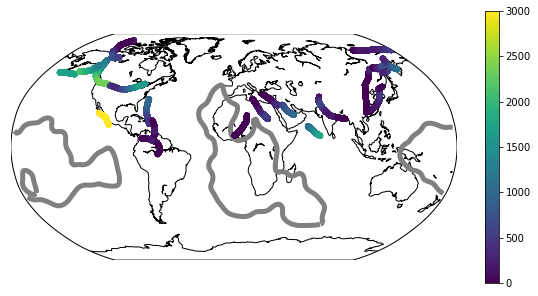

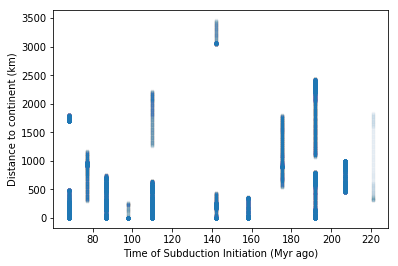

/Users/simon/anaconda2/lib/python2.7/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


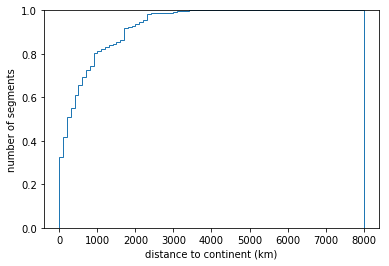

In [6]:
plt.figure(figsize=(10,5))
m = Basemap(projection='robin',lon_0=0)
m.drawcoastlines()
m.readshapefile(LLSVP_edge_filename,'tmp',color='gray',linewidth=5,zorder=2)
x,y = m(np.array(df_init['lon']),np.array(df_init['lat']))
m.scatter(x,y,c=df_init['dist2cont'],edgecolor='',vmin=0,vmax=3000,zorder=4)
plt.colorbar()
plt.show()

plt.figure()
plt.plot(df_init['Age'],df_init['dist2cont'],'.',alpha=0.01)
plt.xlabel('Time of Subduction Initiation (Myr ago)')
plt.ylabel('Distance to continent (km)')
plt.show()

plt.hist(np.array(df_init['dist2cont']),bins=np.arange(0,8001,100),
         cumulative=True,normed=True,histtype='step')
plt.xlabel('distance to continent (km)')
plt.ylabel('number of segments')
plt.ylim(0,1)
#plt.xlim(0,1000)
plt.show()

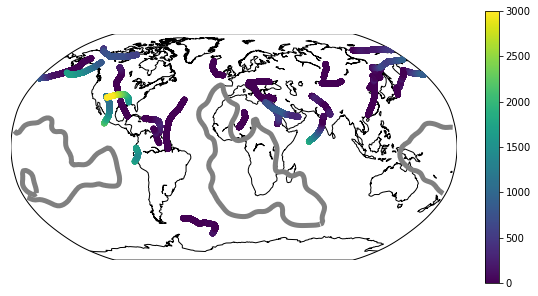

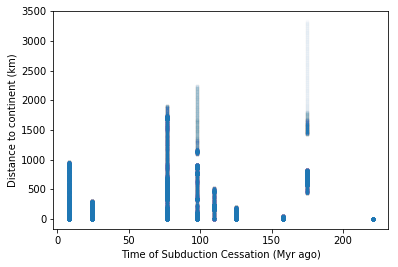

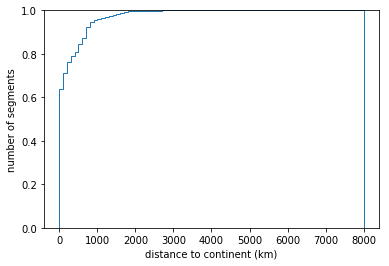

In [7]:
plt.figure(figsize=(10,5))
m = Basemap(projection='robin',lon_0=0)
m.drawcoastlines()
m.readshapefile(LLSVP_edge_filename,'tmp',color='gray',linewidth=5,zorder=2)
x,y = m(np.array(df_death['lon']),np.array(df_death['lat']))
m.scatter(x,y,c=df_death['dist2cont'],edgecolor='',vmin=0,vmax=3000,zorder=4)
plt.colorbar()
plt.show()

plt.figure()
plt.plot(df_death['Age'],df_death['dist2cont'],'.',alpha=0.01)
plt.xlabel('Time of Subduction Cessation (Myr ago)')
plt.ylabel('Distance to continent (km)')
plt.show()

plt.hist(np.array(df_death['dist2cont']),bins=np.arange(0,8001,100),
         cumulative=True,normed=True,histtype='step')
plt.xlabel('distance to continent (km)')
plt.ylabel('number of segments')
plt.ylim(0,1)
#plt.xlim(0,1000)
plt.show()